In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
history=model.fit(train_data,train_target,epochs=100,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 384 samples, validate on 96 samples
Epoch 1/100
384/384 [==============================] - 23s 59ms/step - loss: 0.6662 - acc: 0.6484 - val_loss: 0.6274 - val_acc: 0.6562
Epoch 2/100
384/384 [==============================] - 32s 82ms/step - loss: 0.5890 - acc: 0.6797 - val_loss: 0.5601 - val_acc: 0.7708
Epoch 3/100
384/384 [==============================] - 30s 79ms/step - loss: 0.5413 - acc: 0.7083 - val_loss: 0.5050 - val_acc: 0.7500
Epoch 4/100
384/384 [==============================] - 33s 85ms/step - loss: 0.4761 - acc: 0.7760 - val_loss: 0.5719 - val_acc: 0.6562
Epoch 5/100
384/384 [==============================] - 25s 66ms/step - loss: 0.4517 - acc: 0.7656 - val_loss: 0.4099 - val_acc: 0.8542
Epoch 6/100
384/384 [==============================] - 28s 73ms/step - loss: 0.3299 - acc: 0.8698 - val_loss: 0.4252 - val_acc: 0.7708
Epoch 7/100
384/384 [==============================] - 28s 73ms/step - loss: 0.3010 - acc: 0.8828

384/384 [==============================] - 45s 118ms/step - loss: 2.2114e-04 - acc: 1.0000 - val_loss: 0.3638 - val_acc: 0.9271
Epoch 59/100
384/384 [==============================] - 29s 77ms/step - loss: 2.1878e-04 - acc: 1.0000 - val_loss: 0.3505 - val_acc: 0.9167
Epoch 60/100
384/384 [==============================] - 28s 72ms/step - loss: 2.0708e-04 - acc: 1.0000 - val_loss: 0.3772 - val_acc: 0.9167
Epoch 61/100
384/384 [==============================] - 28s 72ms/step - loss: 2.0683e-04 - acc: 1.0000 - val_loss: 0.3655 - val_acc: 0.9167
Epoch 62/100
384/384 [==============================] - 28s 72ms/step - loss: 1.8714e-04 - acc: 1.0000 - val_loss: 0.3679 - val_acc: 0.9271
Epoch 63/100
384/384 [==============================] - 28s 73ms/step - loss: 1.8292e-04 - acc: 1.0000 - val_loss: 0.3666 - val_acc: 0.9271
Epoch 64/100
384/384 [==============================] - 45s 118ms/step - loss: 1.7426e-04 - acc: 1.0000 - val_loss: 0.3729 - val_acc: 0.9167
Epoch 65/100
384/384 [=========

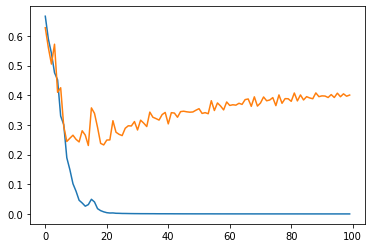

In [10]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

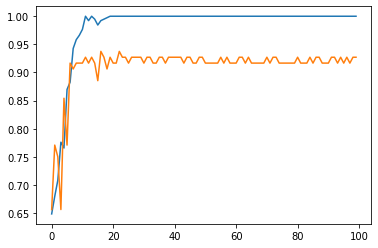

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [12]:
print(model.evaluate(test_data,test_target))

54/54 [==============================] - 1s 11ms/step
[0.013307666130087993, 1.0]


In [13]:
model.save_weights('CINNOMON TYPE CNN.h5')